### Importing Libraries

Importing Necessary libraries for Exploratory Data Analysis and Visualization.

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

### Load Cleaned E-Commerce Dataset

Using pandas, load the fresh, newly cleaned dataset Ecommerce.

In [3]:
Ecommerce = pd.read_csv('Ecommerce_Cleaned.csv',low_memory=False)
pd.set_option('display.max_columns', None)

# Date time transformation
Ecommerce['Order Date'] = pd.to_datetime(Ecommerce['Order Date'], format = '%Y-%m-%d')
Ecommerce['Ship Date'] = pd.to_datetime(Ecommerce['Ship Date'], format = '%Y-%m-%d')

Ecommerce.head(5)

,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Quantity,Discount,Order Priority,Customer Name,Segment,City,State,Country,Region,Sales USD,Profit USD,Shipping Cost USD,Order Days of Week,Order Months,Order Weektype,Order Year Quarter
0,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,2,0.05,Medium,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,140.0,46.0,4.6,Monday,November,Weekday,4th Quarter
1,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,3,0.03,Medium,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,211.0,112.0,11.0,Tuesday,June,Weekday,2nd Quarter
2,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,5,0.01,Critical,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,117.0,31.0,3.1,Saturday,December,Weekend,4th Quarter
3,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,2,0.05,High,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,118.0,26.0,2.6,Saturday,May,Weekend,2nd Quarter
4,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,1,0.04,Critical,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,250.0,160.0,16.0,Thursday,July,Weekday,3rd Quarter


### Dataset Basic Statistic

Basic Statistic Structure.

In [4]:
Ecommerce.describe()

,Aging,Quantity,Discount,Sales USD,Profit USD,Shipping Cost USD
count,51288.000000,51288.000000,51288.000000,51288.000000,51288.000000,51288.000000
mean,5.254796,2.997270,0.029972,156.428794,72.345633,7.105366
std,2.959987,1.413494,0.014114,65.780917,49.066315,4.722637
min,1.000000,1.000000,0.010000,33.000000,0.500000,0.100000
25%,3.000000,2.000000,0.020000,109.000000,25.000000,2.600000
50%,5.000000,3.000000,0.030000,159.000000,67.000000,6.700000
75%,8.000000,4.000000,0.040000,218.000000,120.000000,12.000000
max,10.000000,5.000000,0.050000,250.000000,167.000000,16.000000


### Numerical Feature Plot

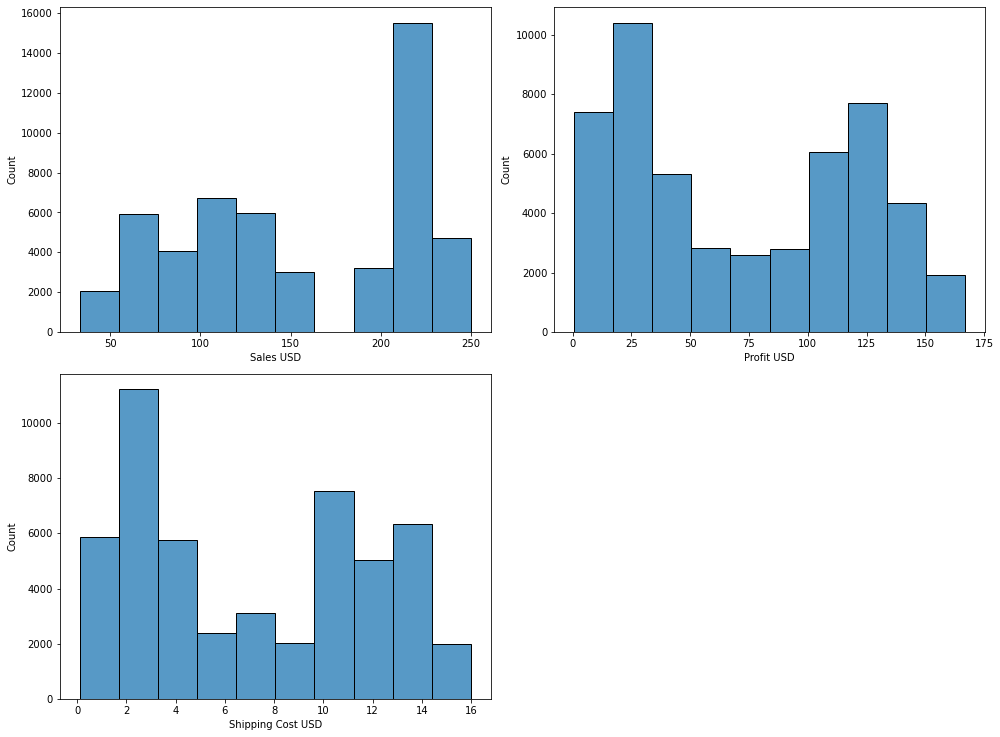

In [5]:
Ecomm_num = Ecommerce[['Sales USD','Profit USD','Shipping Cost USD']]

plt.figure(figsize=(14, 15))
for i in range(0, len(list(Ecomm_num))):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=Ecommerce[list(Ecomm_num)[i]],bins = 10)
    plt.tight_layout()

### Outliers Checking

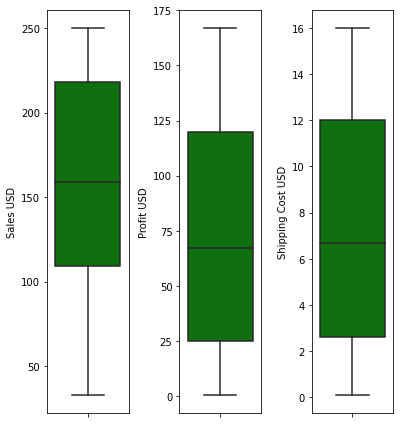

In [6]:
plt.figure(figsize=(13, 6))
for i in range(0, len(list(Ecomm_num))):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=Ecommerce[list(Ecomm_num)[i]],color='green',orient='v')
    plt.tight_layout()

It is seen that there are no outlieron within the features.

### Correlation Plot

<AxesSubplot:>

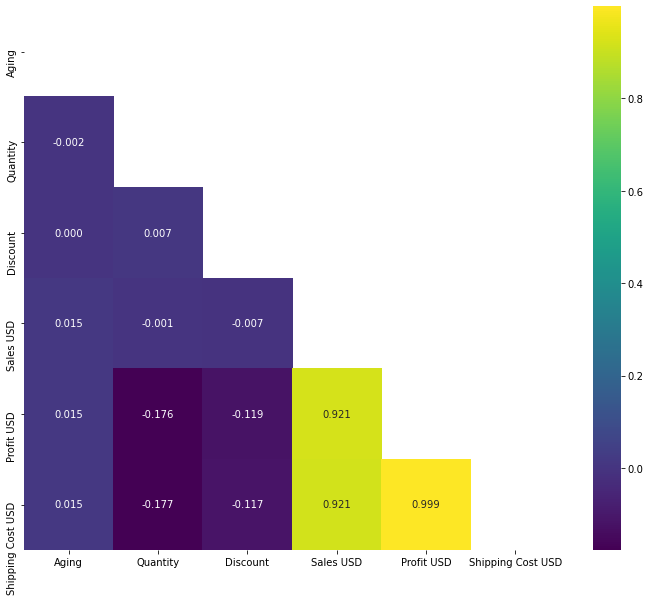

In [7]:
corr_= Ecommerce.corr()
upmatrix = np.triu(corr_)
plt.figure(figsize=(12,10))
sns.heatmap(corr_, annot=True, fmt = ".3f",mask=upmatrix, cmap='viridis')

Correlation plot suggests, of the variables, the highest correlated features are Sales USD, Profit USD and Shipping Cost USD. It is reasonable, because a higher sales means a higher profit. The same applies the higher the shipping cost, also reulsting in a higher profit obtained.

### Customer Distribution Plot

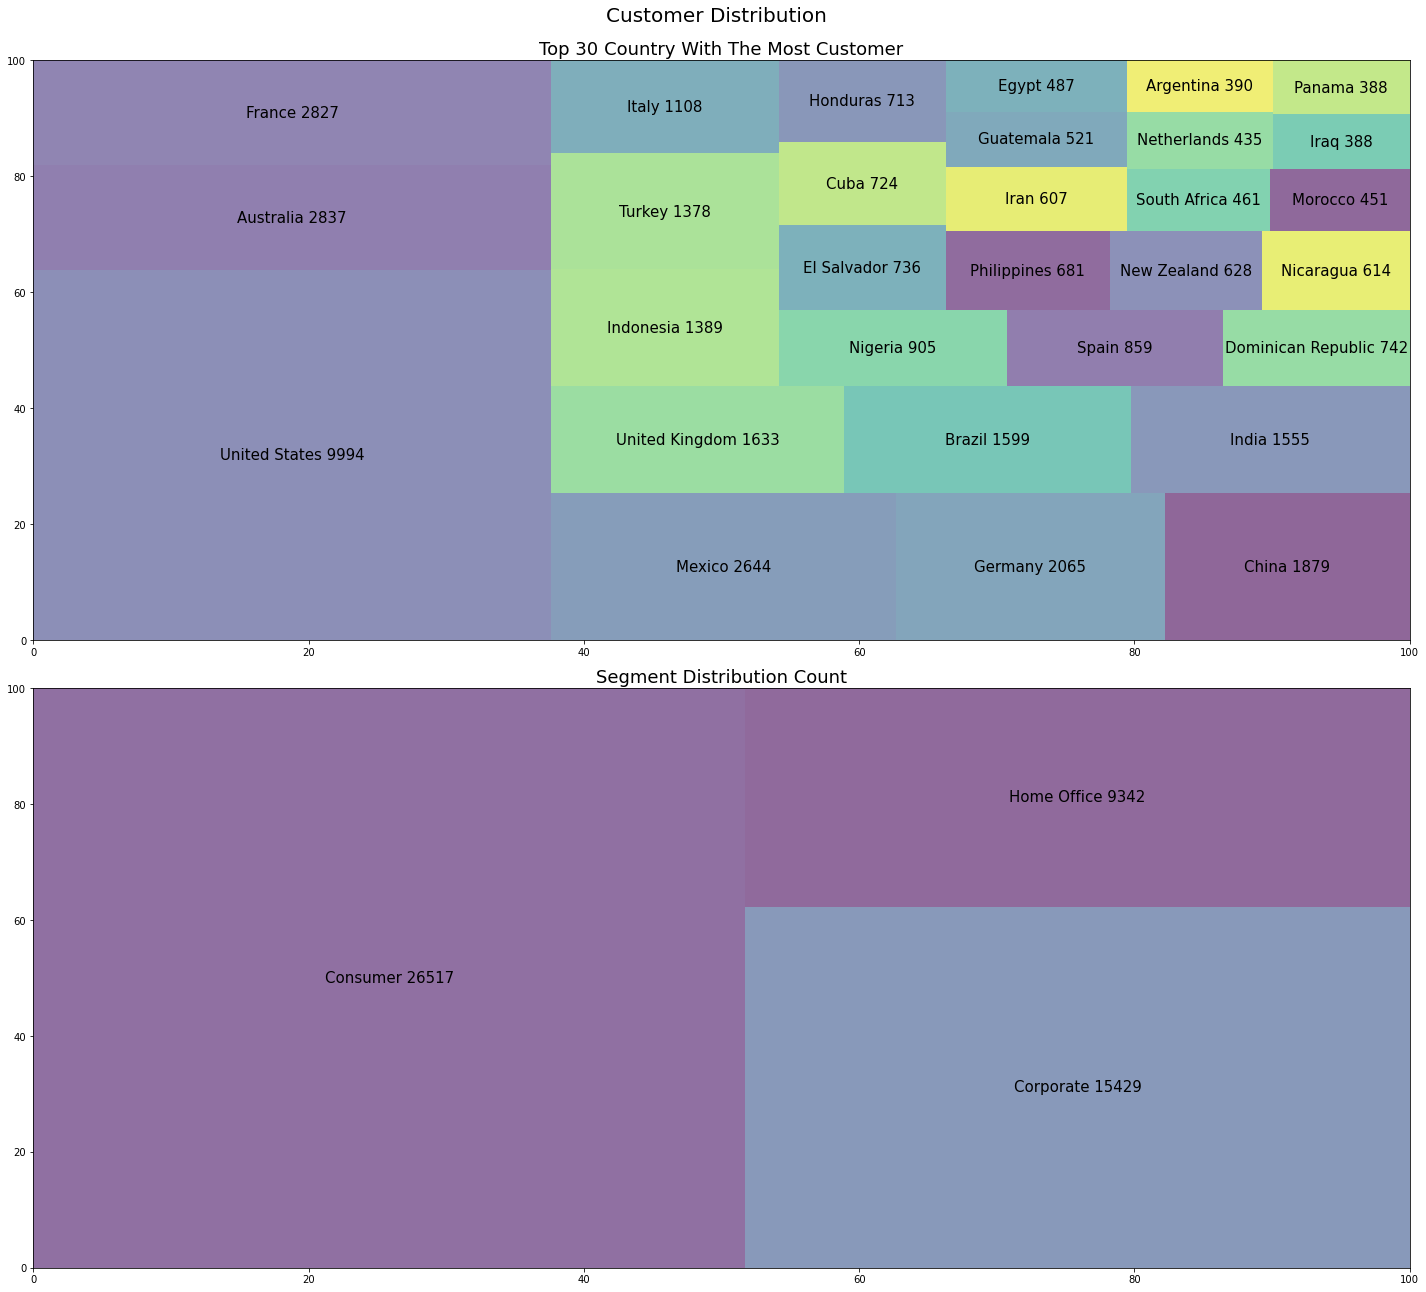

In [8]:
fig, (ax5, ax6) = plt.subplots(2, 1,figsize=(20,18))
fig.suptitle("Customer Distribution", fontsize=20, verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,1,1)
size = Ecommerce.groupby('Country',)['Customer Name'].count().sort_values(ascending= False)[:30].tolist() 
label=Ecommerce.groupby('Country',)['Customer Name'].count().sort_values(ascending= False)[:30].index.values.tolist()
label = [i+" "+j for i, j in zip(label, [str(x) for x in size])]
ax5 = squarify.plot(sizes=size, label=label, alpha=.6, text_kwargs={'fontsize':15})
ax5.set_title('Top 30 Country With The Most Customer', fontsize=18, fontweight='normal')

#Plot 2
plt.subplot(2,1,2)
size4 = Ecommerce.groupby('Segment',)['Segment'].count().sort_values(ascending= False).tolist() 
label4 = Ecommerce.groupby('Segment',)['Segment'].count().sort_values(ascending= False).index.values.tolist()
label4 = [i+" "+j for i, j in zip(label4, [str(x) for x in size4])]
ax6 = squarify.plot(sizes=size4, label=label4, alpha=.6, text_kwargs={'fontsize':15})
ax6.set_title('Segment Distribution Count', fontsize=18, fontweight='normal')

plt.tight_layout()

The first plot shows the country with most the customers, here there are United States followed by Australia and the France. For united State, it is understood why many customer come from the country, becuse the Ecommerce where the dataset is from is US based ecommerce. So then, it is natural the majority comes from the United States. While the second plot shows the customer segmentation, it is dominantly consumer who bought from the ecommerce followed by corporate and then home office in third.

### Product Distribution Plot

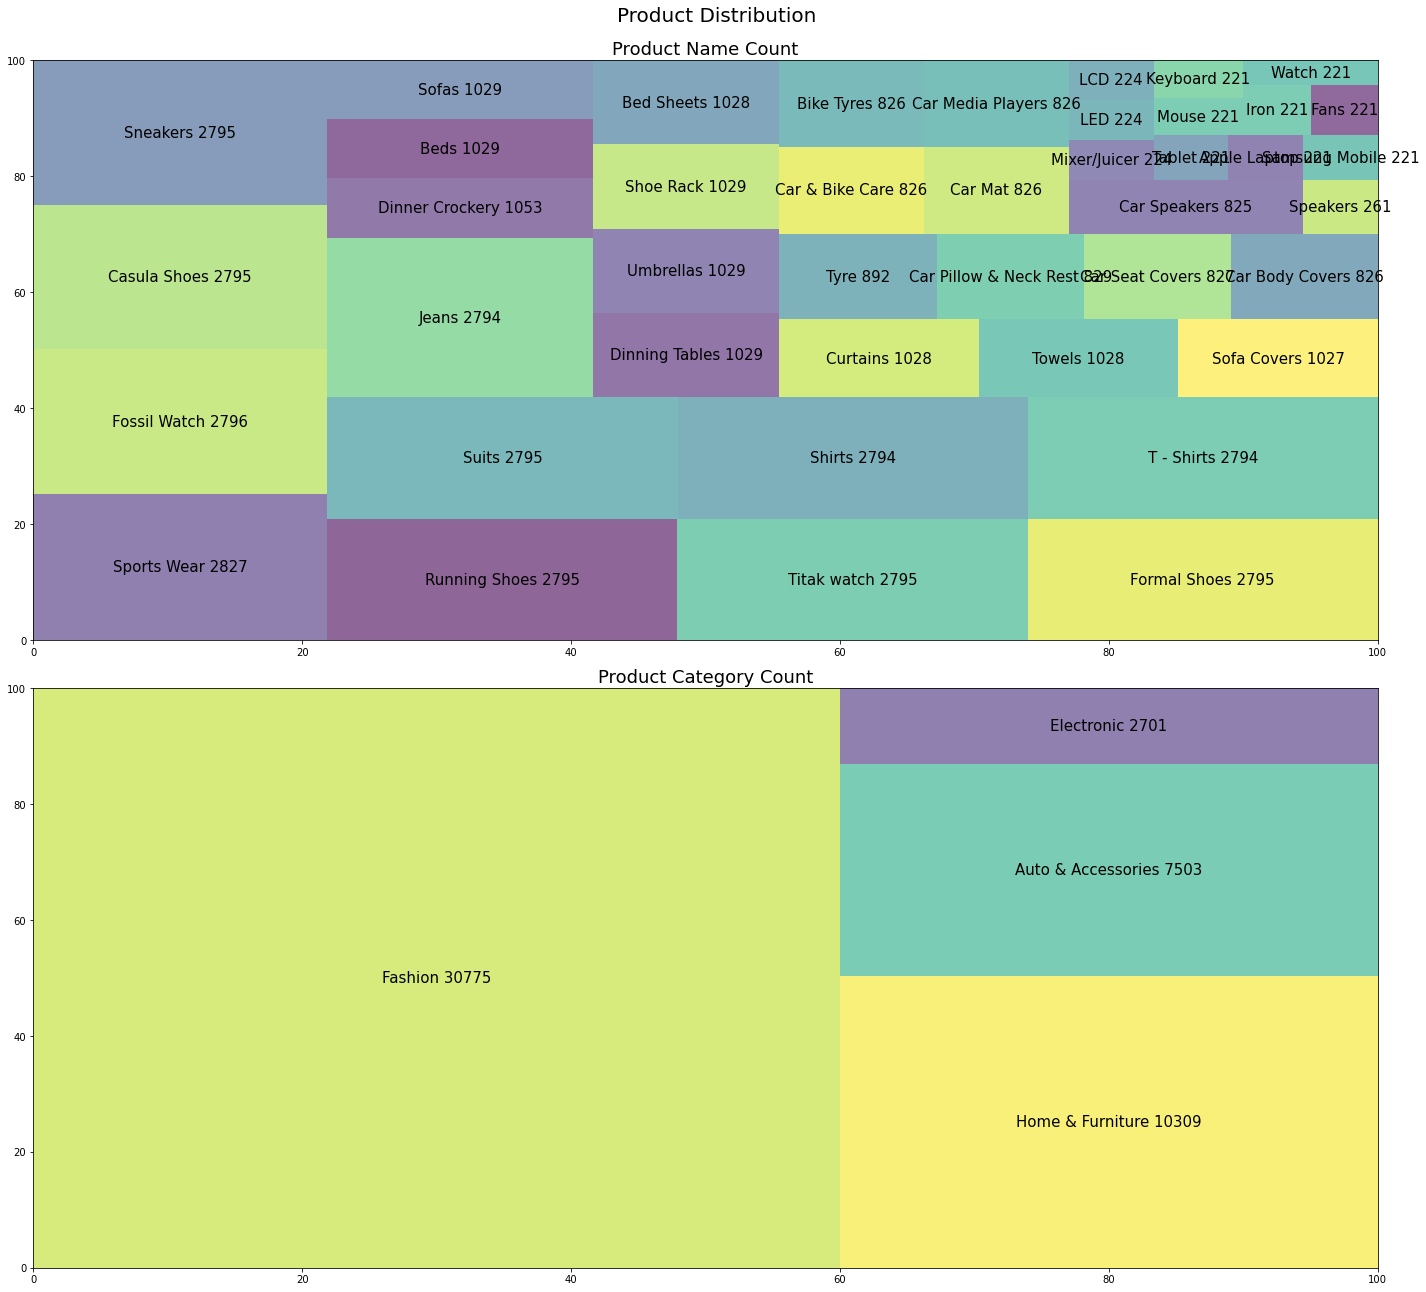

In [9]:
fig, (ax7, ax8) = plt.subplots(2, 1,figsize=(20,18))
fig.suptitle("Product Distribution", fontsize=20, verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,1,1)
size2 = Ecommerce.groupby('Product',)['Product'].count().sort_values(ascending= False).tolist() 
label2 = Ecommerce.groupby('Product',)['Product'].count().sort_values(ascending= False).index.values.tolist()
label2 = [i+" "+j for i, j in zip(label2, [str(x) for x in size2])]
ax7 = squarify.plot(sizes=size2, label=label2, alpha=.6, text_kwargs={'fontsize':15})
ax7.set_title('Product Name Count', fontsize=18, fontweight='normal')

#Plot 2
plt.subplot(2,1,2)
size3 = Ecommerce.groupby('Product Category',)['Product Category'].count().sort_values(ascending= False).tolist() 
label3 = Ecommerce.groupby('Product Category',)['Product Category'].count().sort_values(ascending= False).index.values.tolist()
label3 = [i+" "+j for i, j in zip(label3, [str(x) for x in size3])]
ax8 = squarify.plot(sizes=size3, label=label3, alpha=.6, text_kwargs={'fontsize':15})
ax8.set_title('Product Category Count', fontsize=18, fontweight='normal')

plt.tight_layout()

It is clear as a day, the products bought the most by the customers falls in to the fashion category.

### Categorical Features Plotting in Respect to Target (Profit USD)

The end goal for this project is to build a machine learning algorithm which can predict how much can the model predict and generate profit. So, we are going to do a various plotting categorical based /  in respect the target feature. 

### Total Profit per Product / Product Category

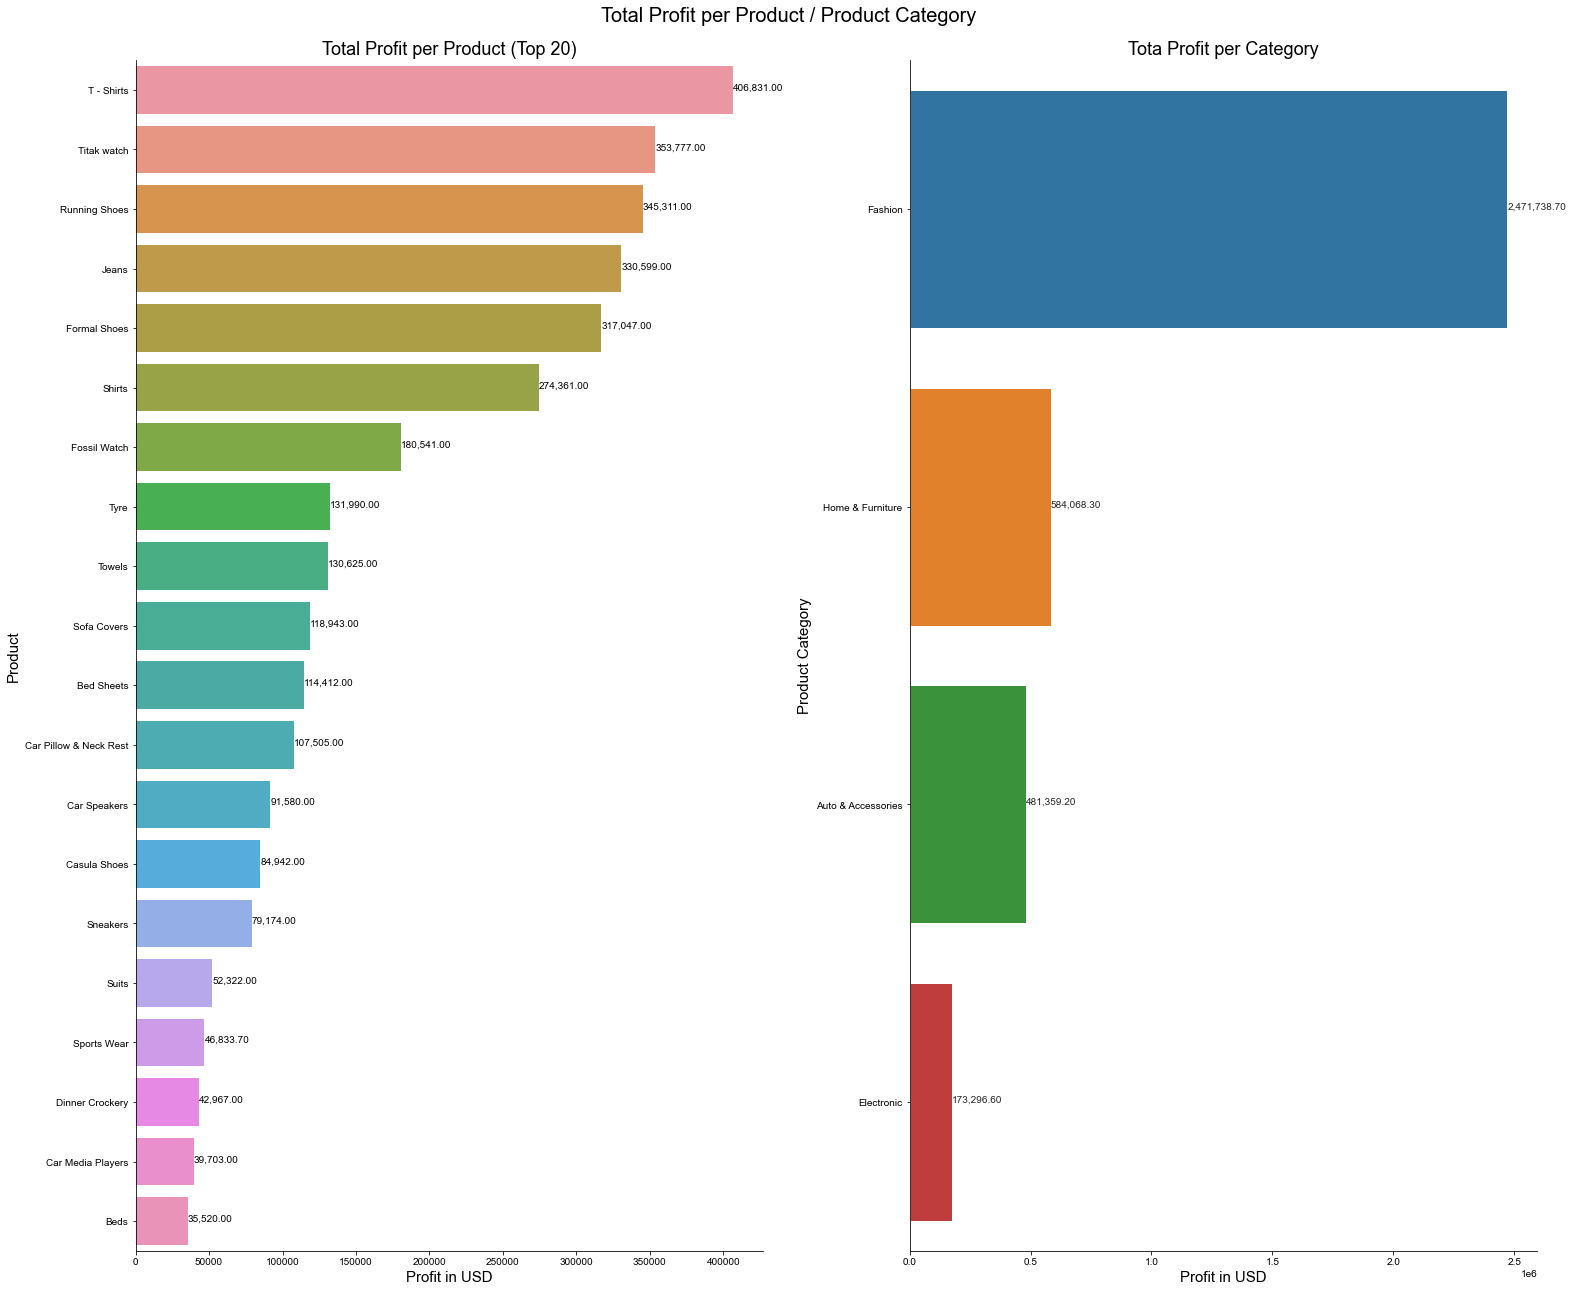

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(22,18))
fig.suptitle("Total Profit per Product / Product Category", fontsize=20, verticalalignment="bottom")
 
#Plot 1
Ecomm_prod = pd.DataFrame(Ecommerce.groupby('Product', as_index=False)['Profit USD'].sum())
Ecomm_prod = Ecomm_prod.sort_values(by='Profit USD', ascending=False)

ax1 = sns.barplot(x='Profit USD', y='Product',ax=ax1, data=Ecomm_prod[:20])
y1 = Ecomm_prod['Profit USD'][:20]
for i, v in enumerate(y1):
    ax1.text(v+5, i, '{:,.2f}'.format(v))
ax1.set_ylabel('Product',fontsize=15,fontweight='normal')    
ax1.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Total Profit per Product (Top 20)',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

#Plot 2
Ecomm_prodcat = pd.DataFrame(Ecommerce.groupby('Product Category', as_index=False)['Profit USD'].sum())
Ecomm_prodcat = Ecomm_prodcat.sort_values(by='Profit USD', ascending=False)

ax2 = sns.barplot(x='Profit USD', y='Product Category',ax=ax2, data=Ecomm_prodcat)
y2 = Ecomm_prodcat['Profit USD']
for i, v in enumerate(y2):
    ax2.text(v+5, i, '{:,.2f}' .format(v))
ax2.set_ylabel('Product Category',fontsize=15,fontweight='normal')    
ax2.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Tota Profit per Category',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

plt.tight_layout()

The left plot shows the top 20 products which are bought by the customers the most, / making much higher profit, where T-shirt, wacth, Running shoes, Jeans and Formal Shoes are amongst of the top 5. It is also understood that products which makes the most profit also fall into Fashion category as represented by the right plot. It is alligned with the previous plot.

### Total Profit per Country / Region

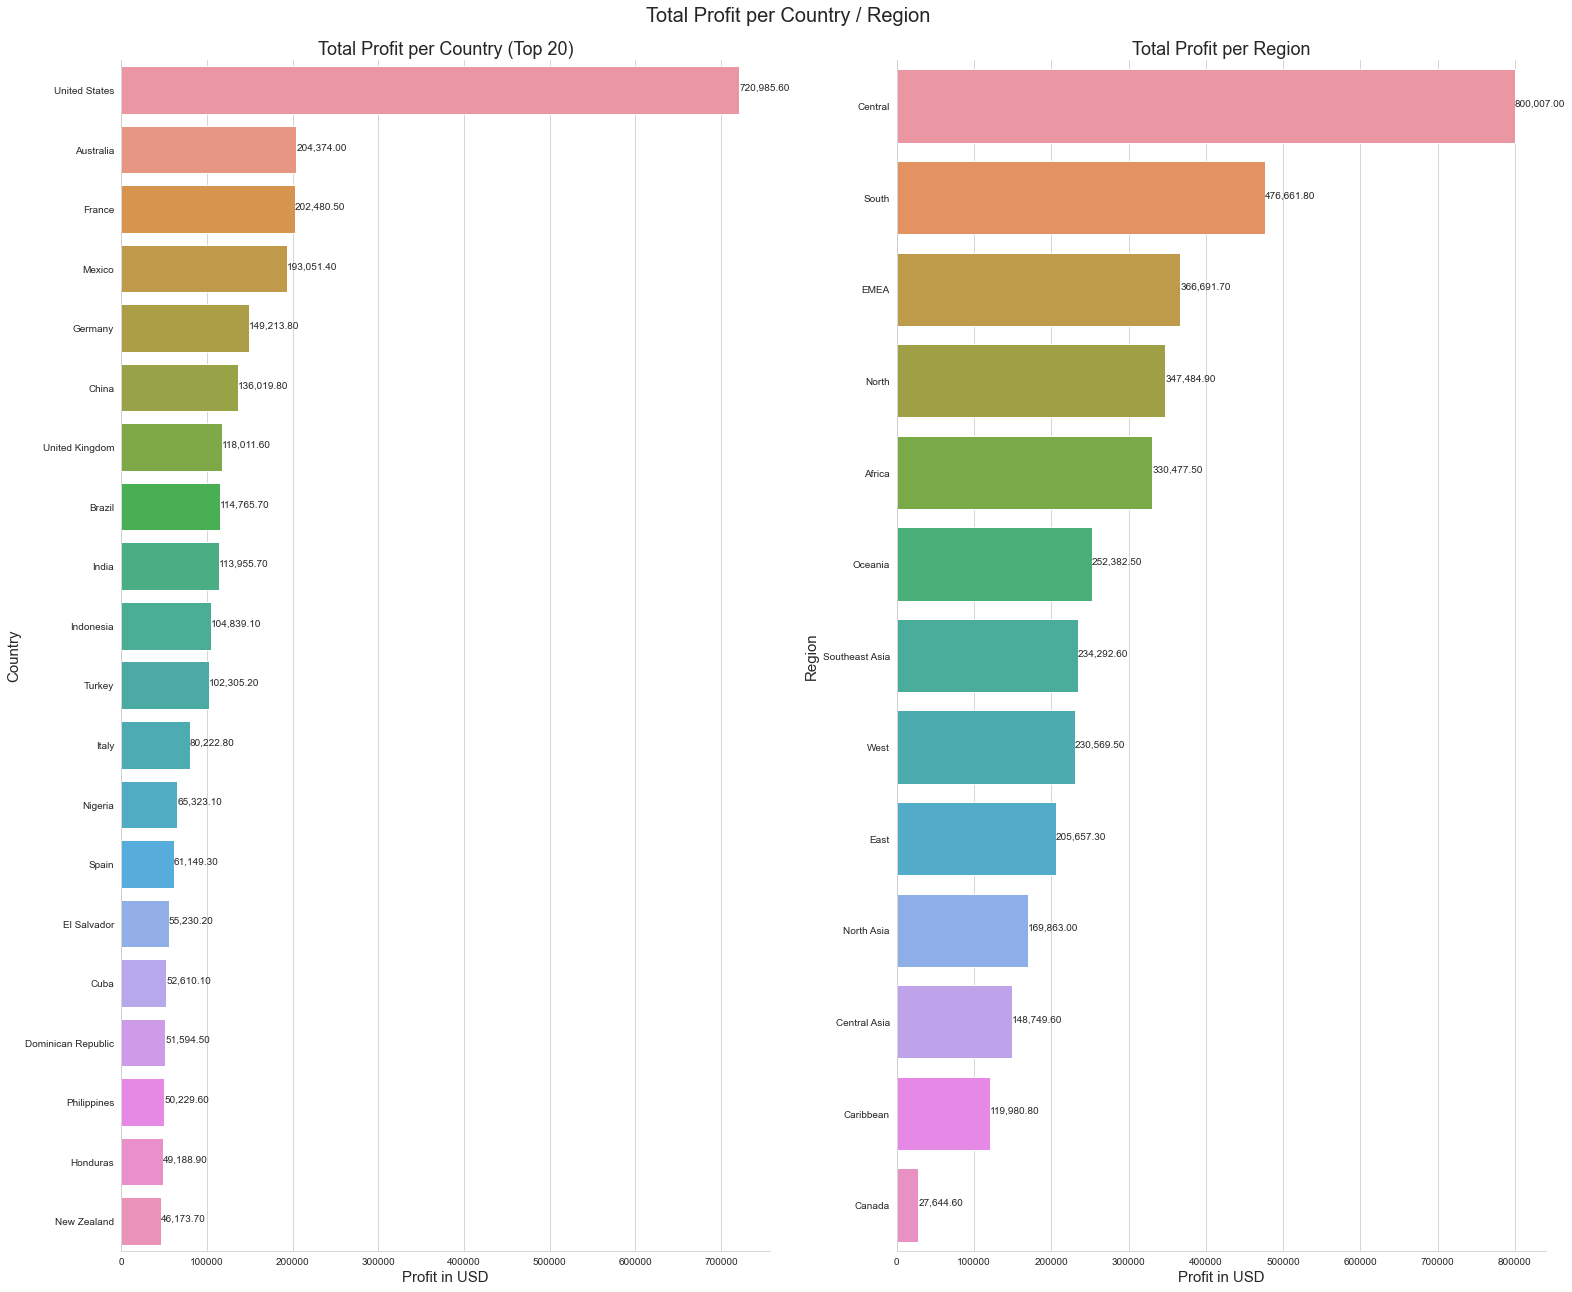

In [11]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(22,18))
fig.suptitle("Total Profit per Country / Region", fontsize=20, verticalalignment="bottom")
 
#Plot 1
Ecomm_ct = pd.DataFrame(Ecommerce.groupby('Country', as_index=False)['Profit USD'].sum())
Ecomm_ct = Ecomm_ct.sort_values(by='Profit USD', ascending=False)

ax3 = sns.barplot(x='Profit USD', y='Country',ax=ax3, data=Ecomm_ct[:20])
y3 = Ecomm_ct['Profit USD'][:20]
for i, v in enumerate(y3):
    ax3.text(v+5, i, '{:,.2f}'.format(v))
ax3.set_ylabel('Country',fontsize=15,fontweight='normal')    
ax3.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Total Profit per Country (Top 20)',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

#Plot 2
Ecomm_reg = pd.DataFrame(Ecommerce.groupby('Region', as_index=False)['Profit USD'].sum())
Ecomm_reg = Ecomm_reg.sort_values(by='Profit USD', ascending=False)

ax4 = sns.barplot(x='Profit USD', y='Region',ax=ax4, data=Ecomm_reg)
y4 = Ecomm_reg['Profit USD']
for i, v in enumerate(y4):
    ax4.text(v+5, i, '{:,.2f}'.format(v))
ax4.set_ylabel('Region',fontsize=15,fontweight='normal')    
ax4.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Total Profit per Region',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

plt.tight_layout()

The left plot shows the top 20 country generating higher profit for the ecommerce. Again, United States top the chart just as i explained in the previous plot where customers are dominantly live in the US, So it is natural that the States also generates more profit for the Ecommerce. In the second place it is Australia, followed France and Mexico and third and fourth. While the right plot shows Region which generates higher profit for the ecomerce. Central and East are amongst the top, it is understood, because the two are parts of The United States.

### Total Profit per Day / Moths

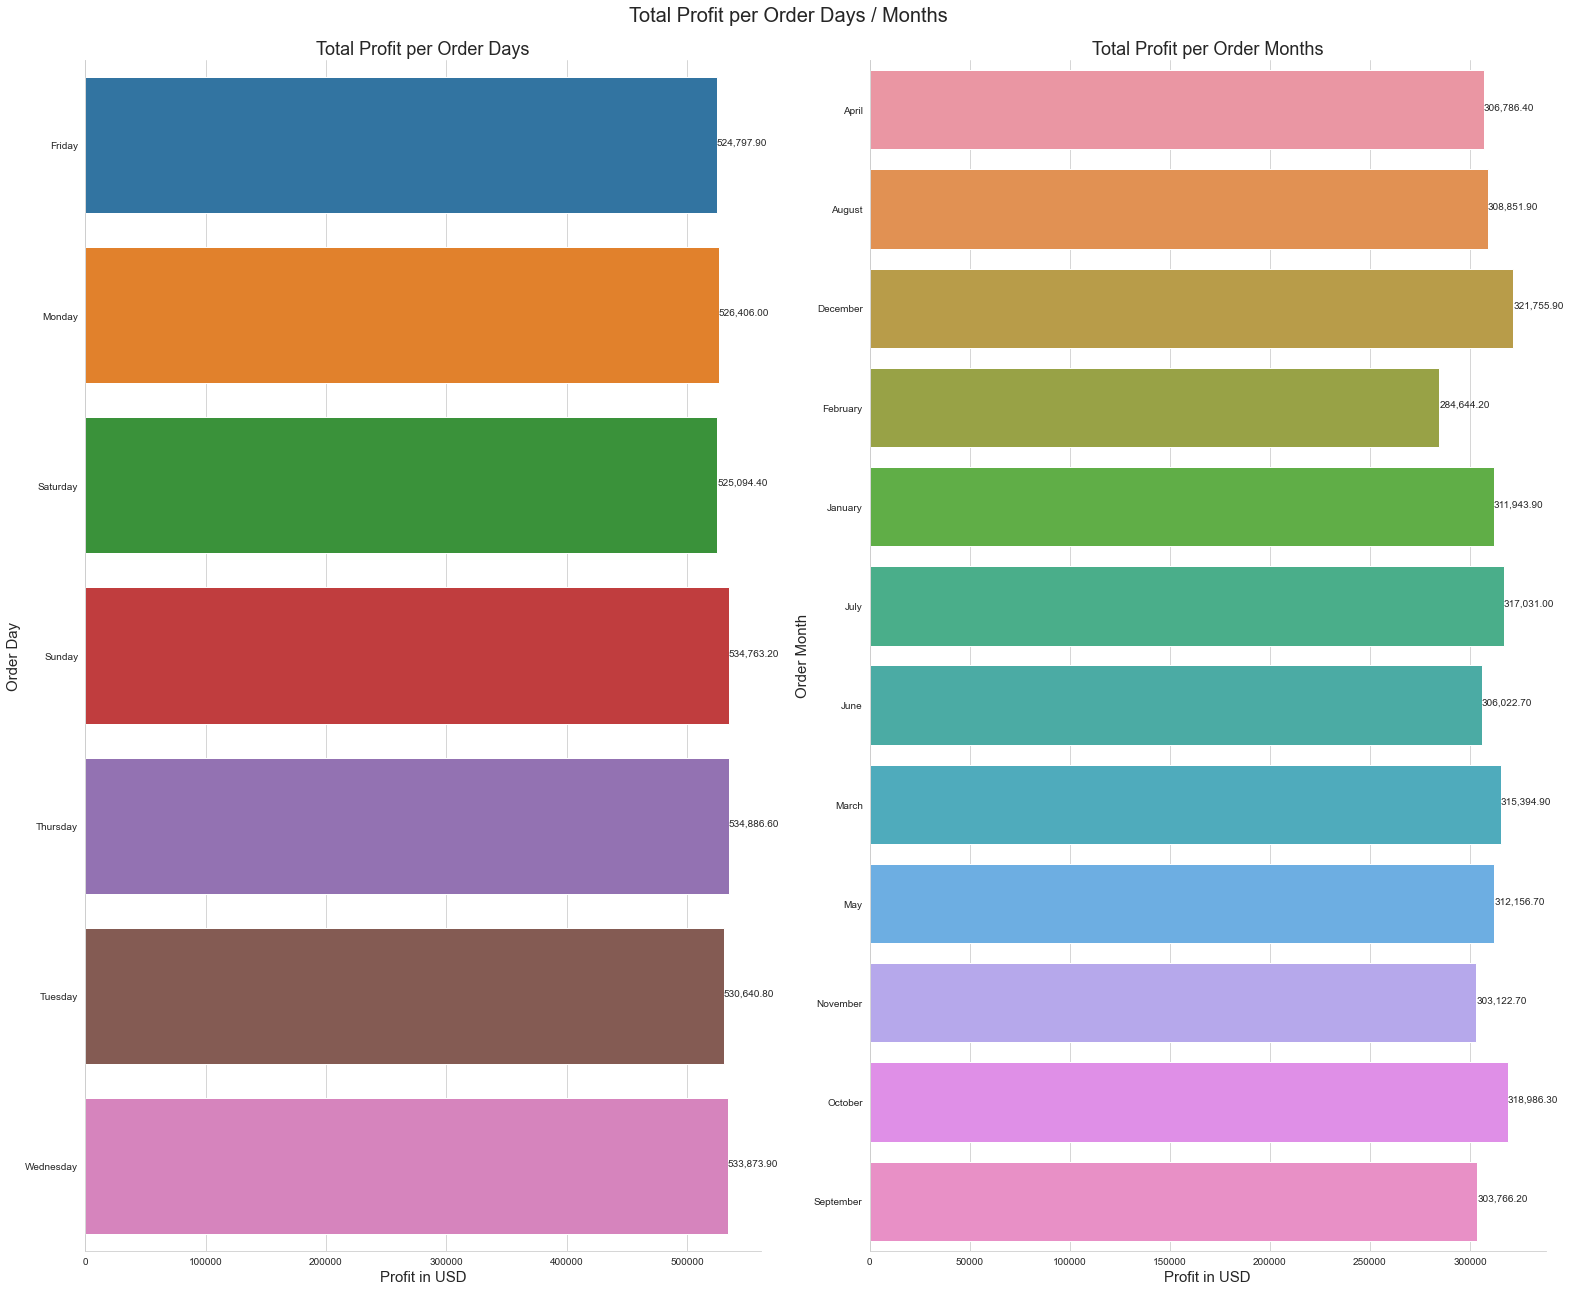

In [12]:
fig, (ax9, ax10) = plt.subplots(1, 2,figsize=(22,18))
fig.suptitle("Total Profit per Order Days / Months", fontsize=20, verticalalignment="bottom")
 
#Plot 1
order_days = pd.DataFrame(Ecommerce.groupby('Order Days of Week', as_index=False)['Profit USD'].sum())

ax9 = sns.barplot(x='Profit USD', y='Order Days of Week',ax=ax9, data=order_days)
y9 = order_days['Profit USD']
for i, v in enumerate(y9):
    ax9.text(v+5, i, '{:,.2f}'.format(v))
ax9.set_ylabel('Order Day',fontsize=15,fontweight='normal')    
ax9.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('Total Profit per Order Days',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

#Plot 2
order_months = pd.DataFrame(Ecommerce.groupby('Order Months', as_index=False)['Profit USD'].sum())

ax10 = sns.barplot(x='Profit USD', y='Order Months',ax=ax10, data=order_months)
y10 = order_months['Profit USD']
for i, v in enumerate(y10):
    ax10.text(v+5, i, '{:,.2f}' .format(v))
ax10.set_ylabel('Order Month',fontsize=15,fontweight='normal')    
ax10.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('Total Profit per Order Months',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

plt.tight_layout()

The left plot shows the total profit generated by each day of the week. It is seen that for every week, it does not fluctuate that much. The ampount of profit generated by the ecommerce per day is almost the same every day of the week / average. Whilst the right plot shows total profit generated per months each year. It is quite diverse per month, but the fluctuation is not that high.

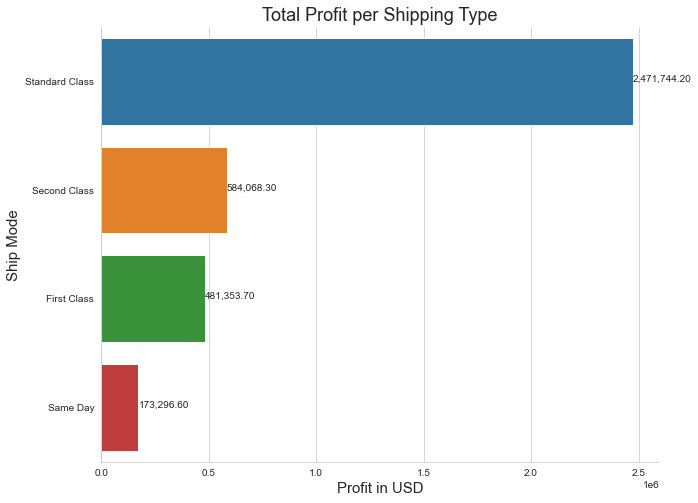

In [14]:
# Changing anomaly value
Ecommerce['Ship Mode'].replace(['45788'],['Standard Class'],inplace=True)

ship_mode = pd.DataFrame(Ecommerce.groupby('Ship Mode', as_index=False)['Profit USD'].sum())
ship_mode = ship_mode.sort_values(by='Profit USD', ascending=False)

plt.figure(figsize=(10,8))
ax13 = sns.barplot(x='Profit USD', y='Ship Mode', data=ship_mode)
y13 = ship_mode['Profit USD']
for i, v in enumerate(y13):
    ax13.text(v+5, i, '{:,.2f}'.format(v))
ax13.set_ylabel('Ship Mode',fontsize=15,fontweight='normal')    
ax13.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)
ax13.set_title('Total Profit per Shipping Type',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

As shown in the plot, Standard Class shipping generates the most profit.

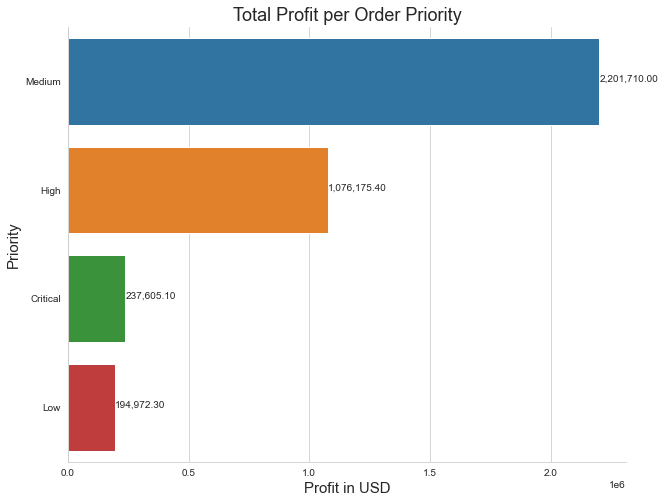

In [15]:
ship_prior = pd.DataFrame(Ecommerce.groupby('Order Priority', as_index=False)['Profit USD'].sum())
ship_prior = ship_prior.sort_values(by='Profit USD', ascending=False)

plt.figure(figsize=(10,8))
ax14 = sns.barplot(x='Profit USD', y='Order Priority', data=ship_prior)
y14 = ship_prior['Profit USD']
for i, v in enumerate(y14):
    ax14.text(v+5, i, '{:,.2f}'.format(v))
ax14.set_ylabel('Priority',fontsize=15,fontweight='normal')    
ax14.set_xlabel('Profit in USD',fontsize=15,fontweight='normal') 
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.set_title('Total Profit per Order Priority',fontsize=18, fontweight='normal')
sns.set_style('whitegrid')

As shown in the plot, Medium order priority generates the most profit.